## Google Colab Setup

Since training the models is quite expensive and time consuming on regular CPUs, we move the training process onto Google Colab using GPUs.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


First installing all requirements of the project, without `nilmtk`.

In [3]:
!pip install -r ./drive/MyDrive/Energy/req_all_but_nilmtk.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 72.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.3/793.3 kB 67.4 MB/s eta 0:00:00
     ━━━━━━━

Next, we cloned the repos of `nilmtk` and `nilm_metadata`, to install the packages from the folder as editables. 

In [5]:
!pip install -e ./drive/MyDrive/Energy/packages/nilm_metadata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Energy/packages/nilm_metadata
  Preparing metadata (setup.py) ... done
  Running setup.py develop for nilm-metadata


For `nilmtk`, we have removed the outdated pins on `numpy` and `pandas` within `setup.py` to fasten the installation process from 60 minutes to down to a few minutes. Most of the time was used to build a wheel of `pandas=0.25.3`.

In [4]:
# Run the line below twice to get nilmtk installed
!pip install -e ./drive/MyDrive/Energy/packages/nilmtk
!pip install -e ./drive/MyDrive/Energy/packages/nilmtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Energy/packages/nilmtk
  Preparing metadata (setup.py) ... done
  Using cached hmmlearn-0.2.8-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (217 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.7 MB/s eta 0:00:00
  Using cached json5-0.9.11-py2.py3-none-any.whl (19 kB)
  Using cached jsonschema-4.17.3-py3-none-any.whl (90 kB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Using cached notebook_shim-0.2.2-py3-none-any.whl (13 kB)
  Using cached jupyter_events-0.6.3-py3-none-any.whl (18 kB)
  Using cached aiofiles-22.1.0-py3-no

After the installation, *restart the Colab Runtime*. 

Moreover, we have a Python version mismatch on Colab. `nilmtk` wants us to have `python=3.8`, but Colab uses `python=3.9`. The `networkx` package might lead to problems, when `dag.py` is called, since `gcd` moved:

```python
from fractions import gcd    # for python 3.8
from math import gcd         # for python 3.9+
```

An update to `dag.py` is necessary. *Restart the Colab Runtime afterwards.*  

In [1]:
# shouldn't error if the steps above are followed
from nilmtk import DataSet

## ML using the API

In [2]:
from pathlib import Path
gdrive = Path("./drive/MyDrive/Energy/data").exists()

In [3]:
from nilmtk import DataSet

data_path = "./drive/MyDrive/Energy/data" if gdrive else "./data"
file_path = f"{data_path}/REFIT.h5"  # google drive
refit = DataSet(file_path)

In [4]:
# Helper function
def ndir(x):
    """ Show properties and methods with no magic methods """
    return [x for x in dir(x) if not x.__contains__("__")]

In [11]:
from nilmtk.api import API
import pickle
import warnings
warnings.filterwarnings("ignore")

### Models

Since we have failed to install `nilmtk-contrib` due to errors with the `nilmtk` version, we copied the three models `seq2point`, `seq2seq` and `BERT` verbatim from the GitHub repository. Only in the `BERT` code, we made slight adjustments to the import statements of `keras`, to reflect our newer version of `tensorflow`.  

In [5]:
# bert.py
"""
This code is copied verbatim from the nitlmk-contrib repo
https://github.com/nilmtk/nilmtk-contrib/blob/master/nilmtk_contrib/disaggregate/bert.py

LICENCE: Apache License 2.0

-- Changes made --

Due to the error:
    AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'dispatch'

We switched the imports from keras to tensorflow.keras
"""

from __future__ import print_function, division
from warnings import warn

from nilmtk.disaggregate import Disaggregator
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Reshape, Flatten,Input,GlobalAveragePooling1D, AveragePooling1D
import os
import pandas as pd
import numpy as np
import pickle
from collections import OrderedDict

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Layer,MultiHeadAttention,LayerNormalization,Embedding
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
import random
random.seed(10)
np.random.seed(10)
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

class SequenceLengthError(Exception):
    pass

class ApplianceNotFoundError(Exception):
    pass

#This code is inspired from :
# https://github.com/keras-team/keras-io/blob/master/examples/nlp/text_classification_with_transformer.py

class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output,att_weights = self.att(inputs, inputs,return_attention_scores=True)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'att'       : self.att,
            'ffn'       : self.ffn,
            'layernorm1': self.layernorm1,
            'layernorm2': self.layernorm2,
            'dropout1': self.dropout1,
            'dropout2': self.dropout2,
        })
        return config

class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'token_emb' : self.token_emb,
            'pos_emb' : self.pos_emb,
        })
        return config    


class LPpool(Layer):
    def __init__(self, pool_size, strides=None, padding='same'):
        super(LPpool,self).__init__()
        self.avgpool=tf.keras.layers.AveragePooling1D(pool_size,strides,padding)

    def call(self, x):
        x = tf.math.pow(tf.math.abs(x), 2)
        x = self.avgpool(x)
        x = tf.math.pow(x, 1.0 / 2)
        return x

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'avgpool'       : self.avgpool,
        })
        return config

class BERT(Disaggregator):

    def __init__(self, params):

        self.MODEL_NAME = "BERT"
        self.chunk_wise_training = params.get('chunk_wise_training',False)
        self.sequence_length = params.get('sequence_length',99)
        self.n_epochs = params.get('n_epochs', 10)
        self.models = OrderedDict()
        self.mains_mean = 1800
        self.mains_std = 600
        self.batch_size = params.get('batch_size',512)
        self.appliance_params = params.get('appliance_params',{})
        if self.sequence_length%2==0:
            print ("Sequence length should be odd!")
            raise (SequenceLengthError)

    def partial_fit(self,train_main,train_appliances,do_preprocessing=True,**load_kwargs):

        print("...............BERT partial_fit running...............")
        if len(self.appliance_params) == 0:
            self.set_appliance_params(train_appliances)

        if do_preprocessing:
            train_main, train_appliances = self.call_preprocessing(
                train_main, train_appliances, 'train')
        train_main = pd.concat(train_main,axis=0)
        train_main = train_main.values.reshape((-1,self.sequence_length,1))
        
        new_train_appliances = []
        for app_name, app_dfs in train_appliances:
            app_df = pd.concat(app_dfs,axis=0)
            app_df_values = app_df.values.reshape((-1,self.sequence_length))
            new_train_appliances.append((app_name, app_df_values))
        train_appliances = new_train_appliances

        for appliance_name, power in train_appliances:
            if appliance_name not in self.models:
                print("First model training for ", appliance_name)
                self.models[appliance_name] = self.return_network()
            else:
                print("Started Retraining model for ", appliance_name)

            model = self.models[appliance_name]
            if train_main.size > 0:
                # Sometimes chunks can be empty after dropping NANS
                if len(train_main) > 10:
                    # Do validation when you have sufficient samples
                    filepath = 'BERT-temp-weights-'+str(random.randint(0,100000))+'.h5'
                    checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
                    train_x, v_x, train_y, v_y = train_test_split(train_main, power, test_size=.15,random_state=10)
                    model.fit(train_x,train_y,validation_data=(v_x,v_y),epochs=self.n_epochs,callbacks=[checkpoint],batch_size=self.batch_size)
                    model.load_weights(filepath)

    def disaggregate_chunk(self,test_main_list,model=None,do_preprocessing=True):

        if model is not None:
            self.models = model

        if do_preprocessing:
            test_main_list = self.call_preprocessing(
                test_main_list, submeters_lst=None, method='test')

        test_predictions = []
        for test_mains_df in test_main_list:

            disggregation_dict = {}
            test_main_array = test_mains_df.values.reshape((-1, self.sequence_length, 1))

            for appliance in self.models:

                prediction = []
                model = self.models[appliance]
                prediction = model.predict(test_main_array ,batch_size=self.batch_size)

                #####################
                # This block is for creating the average of predictions over the different sequences
                # the counts_arr keeps the number of times a particular timestamp has occured
                # the sum_arr keeps the number of times a particular timestamp has occured
                # the predictions are summed for  agiven time, and is divided by the number of times it has occured
                
                l = self.sequence_length
                n = len(prediction) + l - 1
                sum_arr = np.zeros((n))
                counts_arr = np.zeros((n))
                o = len(sum_arr)
                for i in range(len(prediction)):
                    sum_arr[i:i + l] += prediction[i].flatten()
                    counts_arr[i:i + l] += 1
                for i in range(len(sum_arr)):
                    sum_arr[i] = sum_arr[i] / counts_arr[i]

                #################
                prediction = self.appliance_params[appliance]['mean'] + (sum_arr * self.appliance_params[appliance]['std'])
                valid_predictions = prediction.flatten()
                valid_predictions = np.where(valid_predictions > 0, valid_predictions, 0)
                df = pd.Series(valid_predictions)
                disggregation_dict[appliance] = df
            results = pd.DataFrame(disggregation_dict, dtype='float32')
            test_predictions.append(results)
        return test_predictions

    def return_network(self):
        '''Creates the BERT module
        '''
        embed_dim = 32  # Embedding size for each token
        num_heads = 2  # Number of attention heads
        ff_dim = 32  # Hidden layer size in feed forward network inside transformer
        vocab_size = 20000 #vocab for different patterns in reading
        maxlen = self.sequence_length  #maxlength for attention

        model = Sequential()
        model.add(Conv1D(16,4,activation="linear",input_shape=(self.sequence_length,1),padding="same",strides=1))
        model.add(LPpool(pool_size=2))

        #Token and Positional embedding and Encoder part of the transformer
        model.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
        model.add(TransformerBlock(embed_dim, num_heads, ff_dim))

        #Fully connected layer
        model.add(Flatten())
        model.add(Dropout(0.1))
        model.add(Dense(self.sequence_length))
        model.add(Dropout(0.1))
        model.summary()
        model.compile(loss='mse', optimizer='adam', metrics=['mse'])
        return model

    def call_preprocessing(self, mains_lst, submeters_lst, method):

        if method == 'train':            
            processed_mains_lst = []
            for mains in mains_lst:
                new_mains = mains.values.flatten()
                n = self.sequence_length
                units_to_pad = n // 2
                new_mains = np.pad(new_mains, (units_to_pad,units_to_pad),'constant',constant_values = (0,0))
                new_mains = np.array([new_mains[i:i + n] for i in range(len(new_mains) - n + 1)])
                new_mains = (new_mains - self.mains_mean) / self.mains_std
                processed_mains_lst.append(pd.DataFrame(new_mains))
            appliance_list = []
            for app_index, (app_name, app_df_lst) in enumerate(submeters_lst):

                if app_name in self.appliance_params:
                    app_mean = self.appliance_params[app_name]['mean']
                    app_std = self.appliance_params[app_name]['std']
                else:
                    print ("Parameters for ", app_name ," were not found!")
                    raise ApplianceNotFoundError()


                processed_app_dfs = []
                for app_df in app_df_lst:                    
                    new_app_readings = app_df.values.flatten()
                    new_app_readings = np.pad(new_app_readings, (units_to_pad,units_to_pad),'constant',constant_values = (0,0))
                    new_app_readings = np.array([new_app_readings[i:i + n] for i in range(len(new_app_readings) - n + 1)])                    
                    new_app_readings = (new_app_readings - app_mean) / app_std  # /self.max_val
                    processed_app_dfs.append(pd.DataFrame(new_app_readings))
                    
                    
                appliance_list.append((app_name, processed_app_dfs))


            return processed_mains_lst, appliance_list

        else:
            processed_mains_lst = []
            for mains in mains_lst:
                new_mains = mains.values.flatten()
                n = self.sequence_length
                units_to_pad = n // 2
                #new_mains = np.pad(new_mains, (units_to_pad,units_to_pad),'constant',constant_values = (0,0))
                new_mains = np.array([new_mains[i:i + n] for i in range(len(new_mains) - n + 1)])
                new_mains = (new_mains - self.mains_mean) / self.mains_std
                new_mains = new_mains.reshape((-1, self.sequence_length))
                processed_mains_lst.append(pd.DataFrame(new_mains))
            return processed_mains_lst

    def set_appliance_params(self,train_appliances):

        for (app_name,df_list) in train_appliances:
            l = np.array(pd.concat(df_list,axis=0))
            app_mean = np.mean(l)
            app_std = np.std(l)
            if app_std<1:
                app_std = 100
            self.appliance_params.update({app_name:{'mean':app_mean,'std':app_std}})

In [6]:
# seq2seq.py
"""
This code is copied verbatim from the nitlmk-contrib repo
https://github.com/nilmtk/nilmtk-contrib/blob/master/nilmtk_contrib/disaggregate/seq2seq.py

LICENCE: Apache License 2.0
"""

from collections import OrderedDict
import numpy as np
import pandas as pd
from nilmtk.disaggregate import Disaggregator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential


class SequenceLengthError(Exception):
    pass

class ApplianceNotFoundError(Exception):
    pass



class Seq2Seq(Disaggregator):

    def __init__(self, params):

        self.MODEL_NAME = "Seq2Seq"
        self.file_prefix = "{}-temp-weights".format(self.MODEL_NAME.lower())
        self.chunk_wise_training = params.get('chunk_wise_training',False)
        self.sequence_length = params.get('sequence_length',99)
        self.n_epochs = params.get('n_epochs', 10)
        self.models = OrderedDict()
        self.mains_mean = 1800
        self.mains_std = 600
        self.batch_size = params.get('batch_size',512)
        self.appliance_params = params.get('appliance_params',{})
        if self.sequence_length%2==0:
            print ("Sequence length should be odd!")
            raise (SequenceLengthError)

    def partial_fit(self, train_main, train_appliances, do_preprocessing=True, current_epoch=0, **load_kwargs):
        print("...............Seq2Seq partial_fit running...............")
        if len(self.appliance_params) == 0:
            self.set_appliance_params(train_appliances)

        if do_preprocessing:
            train_main, train_appliances = self.call_preprocessing(
                train_main, train_appliances, 'train')

        train_main = pd.concat(train_main, axis=0)
        train_main = train_main.values.reshape((-1, self.sequence_length, 1))
        new_train_appliances = []
        for app_name, app_dfs in train_appliances:
            app_df = pd.concat(app_dfs, axis=0)
            app_df_values = app_df.values.reshape((-1, self.sequence_length))
            new_train_appliances.append((app_name, app_df_values))

        train_appliances = new_train_appliances
        for appliance_name, power in train_appliances:
            if appliance_name not in self.models:
                print("First model training for ", appliance_name)
                self.models[appliance_name] = self.return_network()
            else:
                print("Started Retraining model for ", appliance_name)

            model = self.models[appliance_name]
            if train_main.size > 0:
                # Sometimes chunks can be empty after dropping NANS
                if len(train_main) > 10:
                    # Do validation when you have sufficient samples
                    filepath = self.file_prefix + "-{}-epoch{}.h5".format(
                            "_".join(appliance_name.split()),
                            current_epoch,
                    )
                    checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
                    model.fit(
                            train_main, power,
                            validation_split=.15,
                            epochs=self.n_epochs,
                            batch_size=self.batch_size,
                            callbacks=[ checkpoint ],
                    )
                    model.load_weights(filepath)

                    
    def disaggregate_chunk(self,test_main_list,model=None,do_preprocessing=True):
        if model is not None:
            self.models = model

        if do_preprocessing:
            test_main_list = self.call_preprocessing(
                test_main_list, submeters_lst=None, method='test')

        test_predictions = []
        for test_mains_df in test_main_list:

            disggregation_dict = {}
            test_main_array = test_mains_df.values.reshape((-1, self.sequence_length, 1))

            for appliance in self.models:

                prediction = []
                model = self.models[appliance]
                prediction = model.predict(test_main_array ,batch_size=self.batch_size)

                #####################
                # This block is for creating the average of predictions over the different sequences
                # the counts_arr keeps the number of times a particular timestamp has occured
                # the sum_arr keeps the number of times a particular timestamp has occured
                # the predictions are summed for  agiven time, and is divided by the number of times it has occured
                
                l = self.sequence_length
                n = len(prediction) + l - 1
                sum_arr = np.zeros((n))
                counts_arr = np.zeros((n))
                o = len(sum_arr)
                for i in range(len(prediction)):
                    sum_arr[i:i + l] += prediction[i].flatten()
                    counts_arr[i:i + l] += 1
                for i in range(len(sum_arr)):
                    sum_arr[i] = sum_arr[i] / counts_arr[i]

                #################
                prediction = self.appliance_params[appliance]['mean'] + (sum_arr * self.appliance_params[appliance]['std'])
                valid_predictions = prediction.flatten()
                valid_predictions = np.where(valid_predictions > 0, valid_predictions, 0)
                df = pd.Series(valid_predictions)
                disggregation_dict[appliance] = df
            results = pd.DataFrame(disggregation_dict, dtype='float32')
            test_predictions.append(results)

        return test_predictions

    def return_network(self):

        model = Sequential()
        # 1D Conv
        model.add(Conv1D(30,10,activation="relu",input_shape=(self.sequence_length,1),strides=2))
        model.add(Conv1D(30, 8, activation='relu', strides=2))
        model.add(Conv1D(40, 6, activation='relu', strides=1))
        model.add(Conv1D(50, 5, activation='relu', strides=1))
        model.add(Dropout(.2))
        model.add(Conv1D(50, 5, activation='relu', strides=1))
        model.add(Dropout(.2))
        model.add(Flatten())
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(self.sequence_length))
        model.compile(loss='mse', optimizer='adam')

        return model

    def call_preprocessing(self, mains_lst, submeters_lst, method):

        if method == 'train':            
            processed_mains_lst = []
            for mains in mains_lst:
                new_mains = mains.values.flatten()
                n = self.sequence_length
                units_to_pad = n // 2
                new_mains = np.pad(new_mains, (units_to_pad,units_to_pad),'constant',constant_values = (0,0))
                new_mains = np.array([new_mains[i:i + n] for i in range(len(new_mains) - n + 1)])
                new_mains = (new_mains - self.mains_mean) / self.mains_std
                processed_mains_lst.append(pd.DataFrame(new_mains))
            #new_mains = pd.DataFrame(new_mains)
            appliance_list = []
            for app_index, (app_name, app_df_lst) in enumerate(submeters_lst):

                if app_name in self.appliance_params:
                    app_mean = self.appliance_params[app_name]['mean']
                    app_std = self.appliance_params[app_name]['std']
                else:
                    print ("Parameters for ", app_name ," were not found!")
                    raise ApplianceNotFoundError()


                processed_app_dfs = []
                for app_df in app_df_lst:                    
                    new_app_readings = app_df.values.flatten()
                    new_app_readings = np.pad(new_app_readings, (units_to_pad,units_to_pad),'constant',constant_values = (0,0))
                    new_app_readings = np.array([new_app_readings[i:i + n] for i in range(len(new_app_readings) - n + 1)])                    
                    new_app_readings = (new_app_readings - app_mean) / app_std  # /self.max_val
                    processed_app_dfs.append(pd.DataFrame(new_app_readings))
                    
                    
                appliance_list.append((app_name, processed_app_dfs))
                #new_app_readings = np.array([ new_app_readings[i:i+n] for i in range(len(new_app_readings)-n+1) ])
                #print (new_mains.shape, new_app_readings.shape, app_name)

            return processed_mains_lst, appliance_list

        else:
            processed_mains_lst = []
            for mains in mains_lst:
                new_mains = mains.values.flatten()
                n = self.sequence_length
                units_to_pad = n // 2
                #new_mains = np.pad(new_mains, (units_to_pad,units_to_pad),'constant',constant_values = (0,0))
                new_mains = np.array([new_mains[i:i + n] for i in range(len(new_mains) - n + 1)])
                new_mains = (new_mains - self.mains_mean) / self.mains_std
                new_mains = new_mains.reshape((-1, self.sequence_length))
                processed_mains_lst.append(pd.DataFrame(new_mains))
            return processed_mains_lst

    def set_appliance_params(self,train_appliances):

        for (app_name,df_list) in train_appliances:
            l = np.array(pd.concat(df_list,axis=0))
            app_mean = np.mean(l)
            app_std = np.std(l)
            if app_std<1:
                app_std = 100
            self.appliance_params.update({app_name:{'mean':app_mean,'std':app_std}})

In [7]:
# seq2point.py
"""
This code is copied verbatim from the nitlmk-contrib repo
https://github.com/nilmtk/nilmtk-contrib/blob/master/nilmtk_contrib/disaggregate/seq2point.py

LICENCE: Apache License 2.0
"""

from collections import OrderedDict
import numpy as np
import pandas as pd
from nilmtk.disaggregate import Disaggregator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Reshape, Flatten
from tensorflow.keras.models import Sequential


class SequenceLengthError(Exception):
    pass

class ApplianceNotFoundError(Exception):
    pass

class Seq2Point(Disaggregator):

    def __init__(self, params):
        """
        Parameters to be specified for the model
        """

        self.MODEL_NAME = "Seq2Point"
        self.models = OrderedDict()
        self.file_prefix = "{}-temp-weights".format(self.MODEL_NAME.lower())
        self.chunk_wise_training = params.get('chunk_wise_training',False)
        self.sequence_length = params.get('sequence_length',99)
        self.n_epochs = params.get('n_epochs', 10 )
        self.batch_size = params.get('batch_size',512)
        self.appliance_params = params.get('appliance_params',{})
        self.mains_mean = params.get('mains_mean',1800)
        self.mains_std = params.get('mains_std',600)
        if self.sequence_length%2==0:
            print ("Sequence length should be odd!")
            raise (SequenceLengthError)

    def partial_fit(self, train_main, train_appliances, do_preprocessing=True, current_epoch=0, **load_kwargs):
        # If no appliance wise parameters are provided, then copmute them using the first chunk
        if len(self.appliance_params) == 0:
            self.set_appliance_params(train_appliances)

        print("...............Seq2Point partial_fit running...............")
        # Do the pre-processing, such as  windowing and normalizing
        if do_preprocessing:
            train_main, train_appliances = self.call_preprocessing(
                train_main, train_appliances, 'train')

        train_main = pd.concat(train_main, axis=0)
        train_main = train_main.values.reshape((-1, self.sequence_length, 1))
        new_train_appliances = []
        for app_name, app_df in train_appliances:
            app_df = pd.concat(app_df, axis=0)
            app_df_values = app_df.values.reshape((-1, 1))
            new_train_appliances.append((app_name, app_df_values))
        train_appliances = new_train_appliances

        for appliance_name, power in train_appliances:
            # Check if the appliance was already trained. If not then create a new model for it
            if appliance_name not in self.models:
                print("First model training for", appliance_name)
                self.models[appliance_name] = self.return_network()
            # Retrain the particular appliance
            else:
                print("Started Retraining model for", appliance_name)

            model = self.models[appliance_name]
            if train_main.size > 0:
                # Sometimes chunks can be empty after dropping NANS
                if len(train_main) > 10:
                    # Do validation when you have sufficient samples
                    filepath = self.file_prefix + "-{}-epoch{}.h5".format(
                            "_".join(appliance_name.split()),
                            current_epoch,
                    )
                    checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
                    model.fit(
                            train_main, power,
                            validation_split=0.15,
                            epochs=self.n_epochs,
                            batch_size=self.batch_size,
                            callbacks=[checkpoint],
                    )
                    model.load_weights(filepath)

                    
    def disaggregate_chunk(self,test_main_list,model=None,do_preprocessing=True):
        if model is not None:
            self.models = model

        # Preprocess the test mains such as windowing and normalizing

        if do_preprocessing:
            test_main_list = self.call_preprocessing(test_main_list, submeters_lst=None, method='test')

        test_predictions = []
        for test_main in test_main_list:
            test_main = test_main.values
            test_main = test_main.reshape((-1, self.sequence_length, 1))
            disggregation_dict = {}
            for appliance in self.models:
                prediction = self.models[appliance].predict(test_main,batch_size=self.batch_size)
                prediction = self.appliance_params[appliance]['mean'] + prediction * self.appliance_params[appliance]['std']
                valid_predictions = prediction.flatten()
                valid_predictions = np.where(valid_predictions > 0, valid_predictions, 0)
                df = pd.Series(valid_predictions)
                disggregation_dict[appliance] = df
            results = pd.DataFrame(disggregation_dict, dtype='float32')
            test_predictions.append(results)
        return test_predictions

    def return_network(self):
        # Model architecture
        model = Sequential()
        model.add(Conv1D(30,10,activation="relu",input_shape=(self.sequence_length,1),strides=1))
        model.add(Conv1D(30, 8, activation='relu', strides=1))
        model.add(Conv1D(40, 6, activation='relu', strides=1))
        model.add(Conv1D(50, 5, activation='relu', strides=1))
        model.add(Dropout(.2))
        model.add(Conv1D(50, 5, activation='relu', strides=1))
        model.add(Dropout(.2))
        model.add(Flatten())
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer='adam')  # ,metrics=[self.mse])
        return model

    def call_preprocessing(self, mains_lst, submeters_lst, method):

        if method == 'train':
            # Preprocessing for the train data
            mains_df_list = []
            for mains in mains_lst:
                new_mains = mains.values.flatten()
                n = self.sequence_length
                units_to_pad = n // 2
                new_mains = np.pad(new_mains,(units_to_pad,units_to_pad),'constant',constant_values=(0,0))
                new_mains = np.array([new_mains[i:i + n] for i in range(len(new_mains) - n + 1)])
                new_mains = (new_mains - self.mains_mean) / self.mains_std
                mains_df_list.append(pd.DataFrame(new_mains))

            appliance_list = []
            for app_index, (app_name, app_df_list) in enumerate(submeters_lst):
                if app_name in self.appliance_params:
                    app_mean = self.appliance_params[app_name]['mean']
                    app_std = self.appliance_params[app_name]['std']
                else:
                    print ("Parameters for ", app_name ," were not found!")
                    raise ApplianceNotFoundError()

                processed_appliance_dfs = []

                for app_df in app_df_list:
                    new_app_readings = app_df.values.reshape((-1, 1))
                    # This is for choosing windows
                    new_app_readings = (new_app_readings - app_mean) / app_std  
                    # Return as a list of dataframe
                    processed_appliance_dfs.append(pd.DataFrame(new_app_readings))
                appliance_list.append((app_name, processed_appliance_dfs))
            return mains_df_list, appliance_list

        else:
            # Preprocessing for the test data
            mains_df_list = []

            for mains in mains_lst:
                new_mains = mains.values.flatten()
                n = self.sequence_length
                units_to_pad = n // 2
                new_mains = np.pad(new_mains,(units_to_pad,units_to_pad),'constant',constant_values=(0,0))
                new_mains = np.array([new_mains[i:i + n] for i in range(len(new_mains) - n + 1)])
                new_mains = (new_mains - self.mains_mean) / self.mains_std
                mains_df_list.append(pd.DataFrame(new_mains))
            return mains_df_list

    def set_appliance_params(self,train_appliances):
        # Find the parameters using the first
        for (app_name,df_list) in train_appliances:
            l = np.array(pd.concat(df_list,axis=0))
            app_mean = np.mean(l)
            app_std = np.std(l)
            if app_std<1:
                app_std = 100
            self.appliance_params.update({app_name:{'mean':app_mean,'std':app_std}})
        print (self.appliance_params)

Structure of the models:

In [13]:
Seq2Point({"n_epochs": 5}).return_network().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 90, 30)            330       
                                                                 
 conv1d_1 (Conv1D)           (None, 83, 30)            7230      
                                                                 
 conv1d_2 (Conv1D)           (None, 78, 40)            7240      
                                                                 
 conv1d_3 (Conv1D)           (None, 74, 50)            10050     
                                                                 
 dropout (Dropout)           (None, 74, 50)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 70, 50)            12550     
                                                                 
 dropout_1 (Dropout)         (None, 70, 50)            0

In [14]:
Seq2Seq({"n_epochs": 5}).return_network().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 45, 30)            330       
                                                                 
 conv1d_6 (Conv1D)           (None, 19, 30)            7230      
                                                                 
 conv1d_7 (Conv1D)           (None, 14, 40)            7240      
                                                                 
 conv1d_8 (Conv1D)           (None, 10, 50)            10050     
                                                                 
 dropout_3 (Dropout)         (None, 10, 50)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 6, 50)             12550     
                                                                 
 dropout_4 (Dropout)         (None, 6, 50)            

In [15]:
BERT({"n_epochs": 5}).return_network().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 99, 16)            80        
                                                                 
 l_ppool (LPpool)            (None, 50, 16)            0         
                                                                 
 token_and_position_embeddin  (None, 50, 16, 32)       643168    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 50, 16, 32)       10656     
 merBlock)                                                       
                                                                 
 flatten_2 (Flatten)         (None, 25600)             0         
                                                      

### Building 5

On building 5, we model the tumble dryer and computer.

In [16]:
refit.buildings[5].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=5, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=5, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=5, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=4, building=5, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=5, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=6, building=5, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=7, building=5, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=5, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=5, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=10, buildin

In [18]:
building5_param = {
  "power": {"mains": ["apparent","active"],"appliance": ["apparent","active"]},
  "sample_rate": 60,
  "appliances": [ "tumble dryer", "computer" ],
  "methods": {"Seq2Point": Seq2Point({"n_epochs": 20}), 
              "Seq2Seq": Seq2Seq({"n_epochs": 20}), 
              "Bert": BERT({"n_epochs": 20})},
  "display_predictions": True,
  "train": {    
    "datasets": {
        "Dataport": {
            "path": file_path,
            "buildings": {
                5: {
                    "start_time": "2014-04-01",
                    "end_time": "2014-07-31"
                    }
                }                
            }
        }
    },
  "test": {
    "datasets": {
        "Dataport": {
            "path": file_path,
            "buildings": {
                5: {
                    "start_time": "2014-08-01",
                    "end_time": "2014-08-31"
                    }
                }
            }
        },
        "metrics":["rmse"]
    }
  }

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Dropping missing values
Generating predictions for : Seq2Point
85/85 [==============================] - 0s 2ms/step
Generating predictions for : Seq2Seq
84/84 [==============================] - 0s 2ms/step
Generating predictions for : BERT
84/84 [==============================] - 3s 37ms/step
............  rmse  ..............
               Seq2Point     Seq2Seq        Bert
tumble dryer  404.461447  403.710931  430.557016
computer       35.358060   29.406929   29.883031


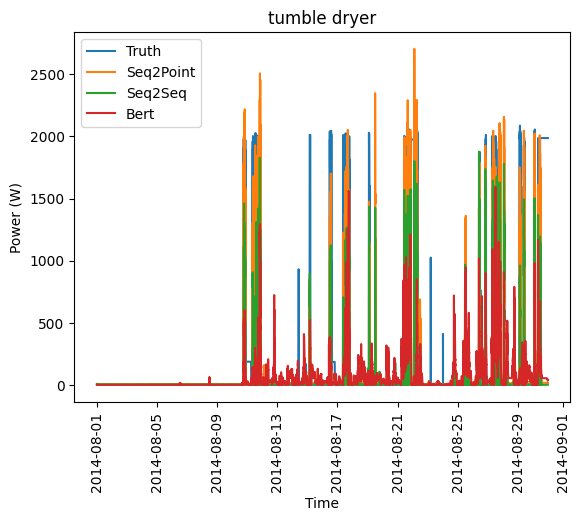

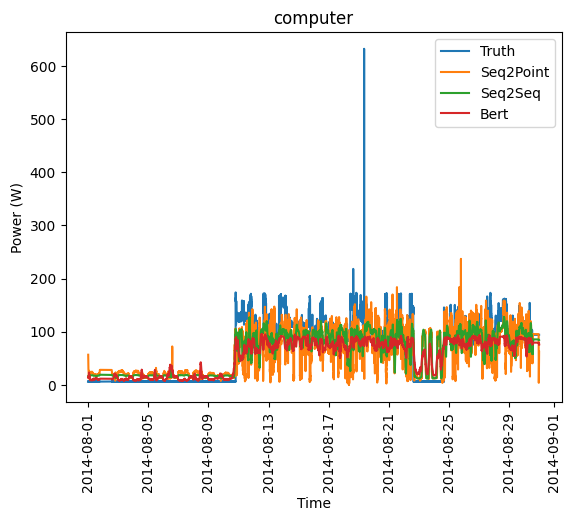

In [25]:
if Path(f"{data_path}/building5.pkl").exists():
    # Load the model and skip the training
    with open(f"{data_path}/building5.pkl", "rb") as f:
        building5_mod = pickle.load(f)
else:    
    # Train the model, save to pickle file
    building5_mod = API(building5_param)
    with open(f"{data_path}/building5.pkl", "wb") as f:
        pickle.dump(building5_mod, f)

# Building 7

In [8]:
refit.buildings[7].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=7, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=7, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=7, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=7, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)])
  ElecMeter(instance=5, building=7, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=6, building=7, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=7, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=7, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=7, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=10, building=7, datas

In [18]:
building7_param = {
  "power": {"mains": ["apparent","active"],"appliance": ["apparent","active"]},
  "sample_rate": 60,
  "appliances": ["kettle", "dish washer"],
  "methods": {"Seq2Point": Seq2Point({"n_epochs": 20}), 
              "Seq2Seq": Seq2Seq({"n_epochs": 20}), 
              "Bert": BERT({"n_epochs": 20})},
  "display_predictions": True,
  "train": {    
    "datasets": {
        "Dataport": {
            "path": file_path,
            "buildings": {
                7: {
                    "start_time": "2014-04-01",
                    "end_time": "2014-07-31"
                    }
                }                
            }
        }
    },
  "test": {
    "datasets": {
        "Dataport": {
            "path": file_path,
            "buildings": {
                7: {
                    "start_time": "2014-08-01",
                    "end_time": "2014-08-31"
                    }
                }
            }
        },
        "metrics":["rmse"]
    }
  }

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Dropping missing values
Generating predictions for : Seq2Point
84/84 [==============================] - 0s 2ms/step
Generating predictions for : Seq2Seq
84/84 [==============================] - 0s 2ms/step
Generating predictions for : BERT
84/84 [==============================] - 3s 36ms/step
............  rmse  ..............
              Seq2Point     Seq2Seq        Bert
kettle        94.423818   85.889694  110.159180
dish washer  150.261231  123.201539  263.455078


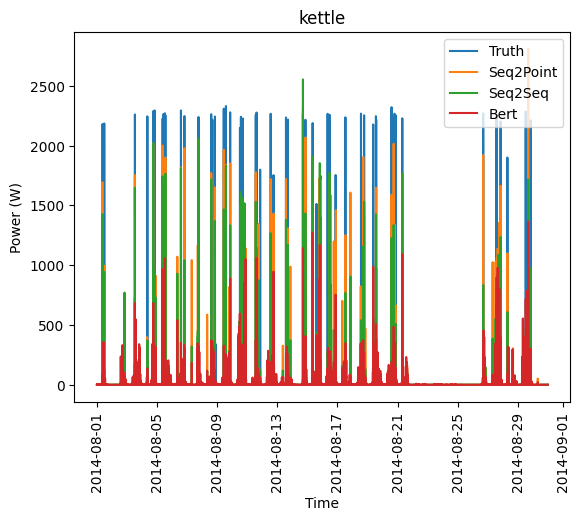

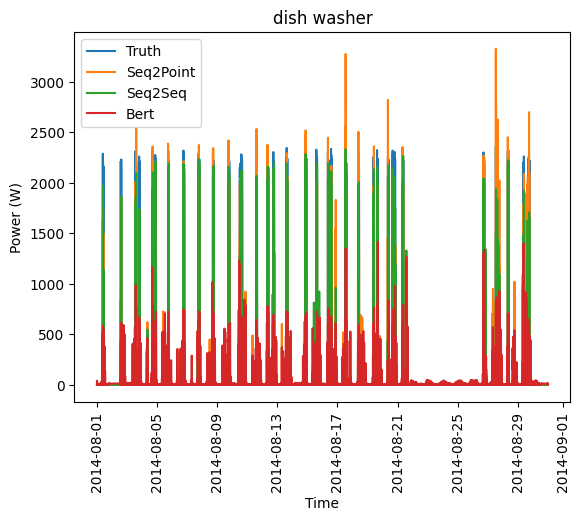

In [19]:
if Path(f"{data_path}/building7.pkl").exists():
    # Load the model and skip the training
    with open(f"{data_path}/building7.pkl", "rb") as f:
        building7_mod = pickle.load(f)
else:    
    # Train the model, save to pickle file
    building7_mod = API(building7_param)
    with open(f"{data_path}/building7.pkl", "wb") as f:
        pickle.dump(building7_mod, f)

## Building 14

In [28]:
refit.buildings[14].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=14, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=14, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=14, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=4, building=14, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=14, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=6, building=14, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=7, building=14, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=14, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=14, dataset='REFIT', appliances=[Appliance(type='audio system', instance=1)])
  ElecMeter(insta

In [29]:
building14_param = {
  "power": {"mains": ["apparent","active"],"appliance": ["apparent","active"]},
  "sample_rate": 60,
  "appliances": [ "fridge freezer", "washing machine", "television", "audio system" ],
  "methods": {"Seq2Point": Seq2Point({"n_epochs": 20}), 
              "Seq2Seq": Seq2Seq({"n_epochs": 20}), 
              "Bert": BERT({"n_epochs": 20})},
  "display_predictions": True,
  "train": {    
    "datasets": {
        "Dataport": {
            "path": file_path,
            "buildings": {
                14: {
                    "start_time": "2014-04-01",
                    "end_time": "2014-07-31"
                    }
                }                
            }
        }
    },
  "test": {
    "datasets": {
        "Dataport": {
            "path": file_path,
            "buildings": {
                14: {
                    "start_time": "2014-08-01",
                    "end_time": "2014-08-31"
                    }
                }
            }
        },
        "metrics":["rmse"]
    }
  }

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Dropping missing values
Generating predictions for : Seq2Point
85/85 [==============================] - 0s 2ms/step
Generating predictions for : Seq2Seq
85/85 [==============================] - 0s 2ms/step
Generating predictions for : BERT
85/85 [==============================] - 3s 37ms/step
............  rmse  ..............
                 Seq2Point    Seq2Seq        Bert
fridge freezer   29.023083  25.343382   38.403976
washing machine  52.110010  58.251725   93.993824
television       26.103031  24.112542   27.136411
audio system     50.335367  51.387784  109.887749


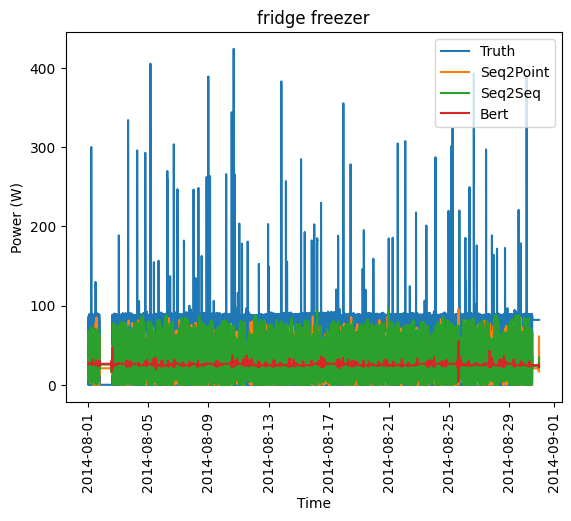

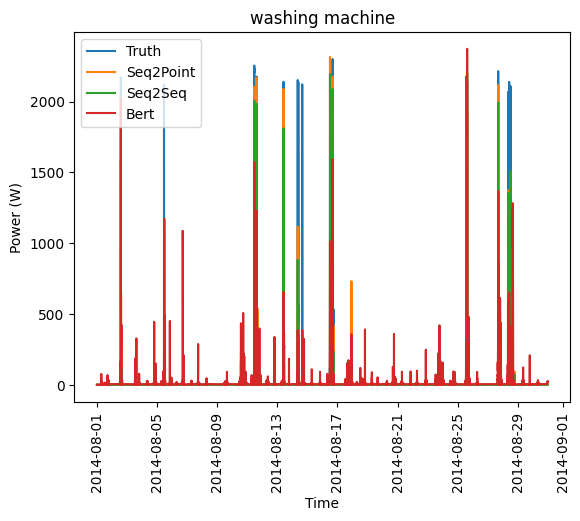

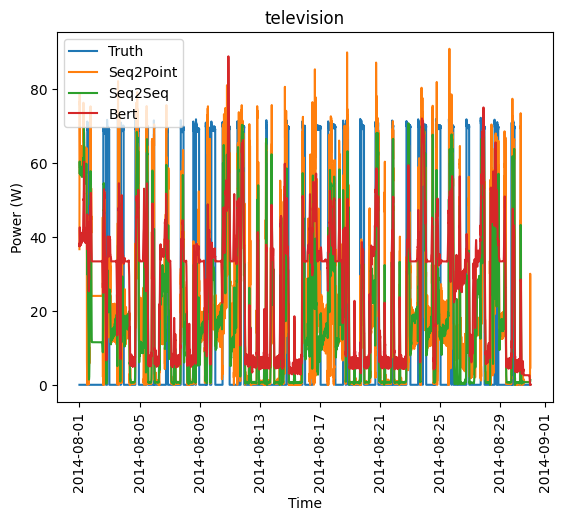

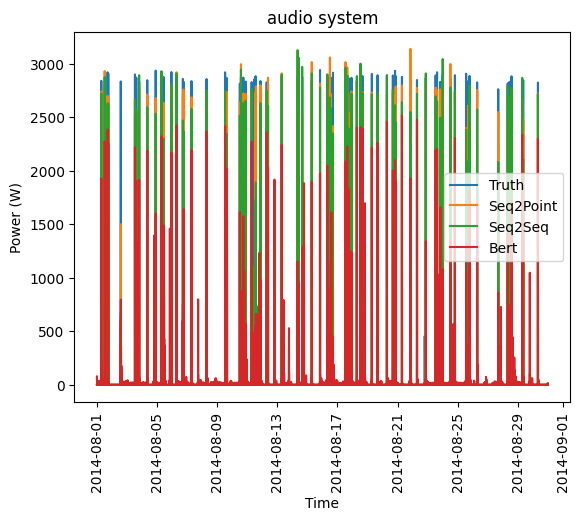

In [30]:
if Path(f"{data_path}/building14.pkl").exists():
    # Load the model and skip the training
    with open(f"{data_path}/building14.pkl", "rb") as f:
        building14_mod = pickle.load(f)
else:    
    # Train the model, save to pickle file
    building14_mod = API(building14_param)
    with open(f"{data_path}/building14.pkl", "wb") as f:
        pickle.dump(building14_mod, f)

## Evaluation

In [ ]:
errors_keys = building5_mod.errors_keys
errors = building5_mod.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Dataport_5_rmse
                  Seq2Seq
fridge freezer  43.049526
computer        28.863447





In [ ]:
building5_mod.pred_overall

{'Seq2Point':                            fridge freezer
 Unix                                     
 2014-04-15 00:00:00+01:00       43.496418
 2014-04-15 00:01:00+01:00       70.132042
 2014-04-15 00:02:00+01:00       90.192581
 2014-04-15 00:03:00+01:00       98.214539
 2014-04-15 00:04:00+01:00       97.536179
 ...                                   ...
 2014-04-19 23:55:00+01:00      221.936844
 2014-04-19 23:56:00+01:00      220.295135
 2014-04-19 23:57:00+01:00      204.435135
 2014-04-19 23:58:00+01:00      169.133743
 2014-04-19 23:59:00+01:00      118.773239
 
 [7167 rows x 1 columns],
 'Seq2Seq':                            fridge freezer
 Unix                                     
 2014-04-15 00:00:00+01:00       44.871185
 2014-04-15 00:01:00+01:00       41.152550
 2014-04-15 00:02:00+01:00       37.272297
 2014-04-15 00:03:00+01:00       34.592930
 2014-04-15 00:04:00+01:00       34.093010
 ...                                   ...
 2014-04-19 23:55:00+01:00       42.330620
 2